# Загрузим необходимое для работы с данными

In [306]:

import pandas as pd
import numpy as np
from IPython.display import display # для цветовой дифференцации анотаций и документации
import matplotlib.pyplot as plt # задание требует работы с графиками
import seaborn as sns # для catplot



# Распакуем  первый csv файл

In [307]:
diabetes = pd.read_csv('data/diabetes.csv')  # Загружаем данные из CSV файла
data1 = diabetes.copy()  # Создаем копию данных
display(data1.head())  # Отображаем первые 5 строк данных
    


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Информация из сопроводительной информации к базе данных и первичная оценка:
Данная база данных - это выборка из бОльшей базы данных. В частности, все пациенты здесь - женщины в возрасте не менее 21 года, родом из племени Пима.
### База данных состоит из столбцов:

0. Pregnancies: Количество беременностей
1. Glucose: Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе
2. BloodPressure: диастолическое артериальное давление (мм рт.ст.)
3. SkinThickness: Толщина кожной складки трицепса (мм)
4. Insulin: 2-часовой сывороточный инсулин (мкме/мл)
5. BMI: Индекс массы тела (вес в кг/(рост в м)^2)
6. DiabetesPedigreeFunction: Функция предрасположенности к диабету
7. Age	: Возраст (в годах)
8. Outcome: переменная класса (0 - нет диабета или 1 - есть диабет)

### Получим чуть больше информации о столбцах таблицы. Так же оценим объем выборки

In [308]:
def summary(data1: pd.DataFrame) -> None:
    """
    Отображает сводную информацию о наборе данных, включая количество строк и столбцов,
    а также общую информацию о типах данных и количестве пропущенных значений.

    Аргументы:
        data (pd.data1): Набор данных, для которого требуется вывести информацию.

    Возвращает:
        None
    """
    print(f"В таблице {data1.shape} строк и столбцов соответственно")  # Выводим размеры таблицы
    data1.info()  # Отображаем информацию о наборе данных
summary(data1)

В таблице (768, 9) строк и столбцов соответственно
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Столбцов с пропущенными значениями нет. Количество непустых значений равно количеству строк в таблице (768 шт)
- Признаки кодируются корректными типами данных, менять их не требуется 

### Создадим отдельные переменные, содержащие столбцы из датасета. Одновременно убираем нули из столбцов, где нолей быть не должно, в дальнейшем это упросит работу.

In [309]:
Pregnancies = data1.iloc[:, 0] 
Glucose = data1[data1.iloc[:, 1] != 0]
BloodPressure = data1[data1.iloc[:, 2] != 0]
SkinThickness = data1[data1.iloc[:, 3] != 0]
Insulin = data1[data1.iloc[:, 4] != 0]
BMI = data1[data1.iloc[:, 5] != 0]
DPF = data1[data1.iloc[:, 6] != 0]
Age = data1[data1.iloc[:, 7] != 0]
Outcome = data1.iloc[:, 8]

# Проанализируем, какие факторы связаны с развитием диабета, а какие нет.

Для начала построим  Тепловую карту - для оценки влияния факторов друг на друга.

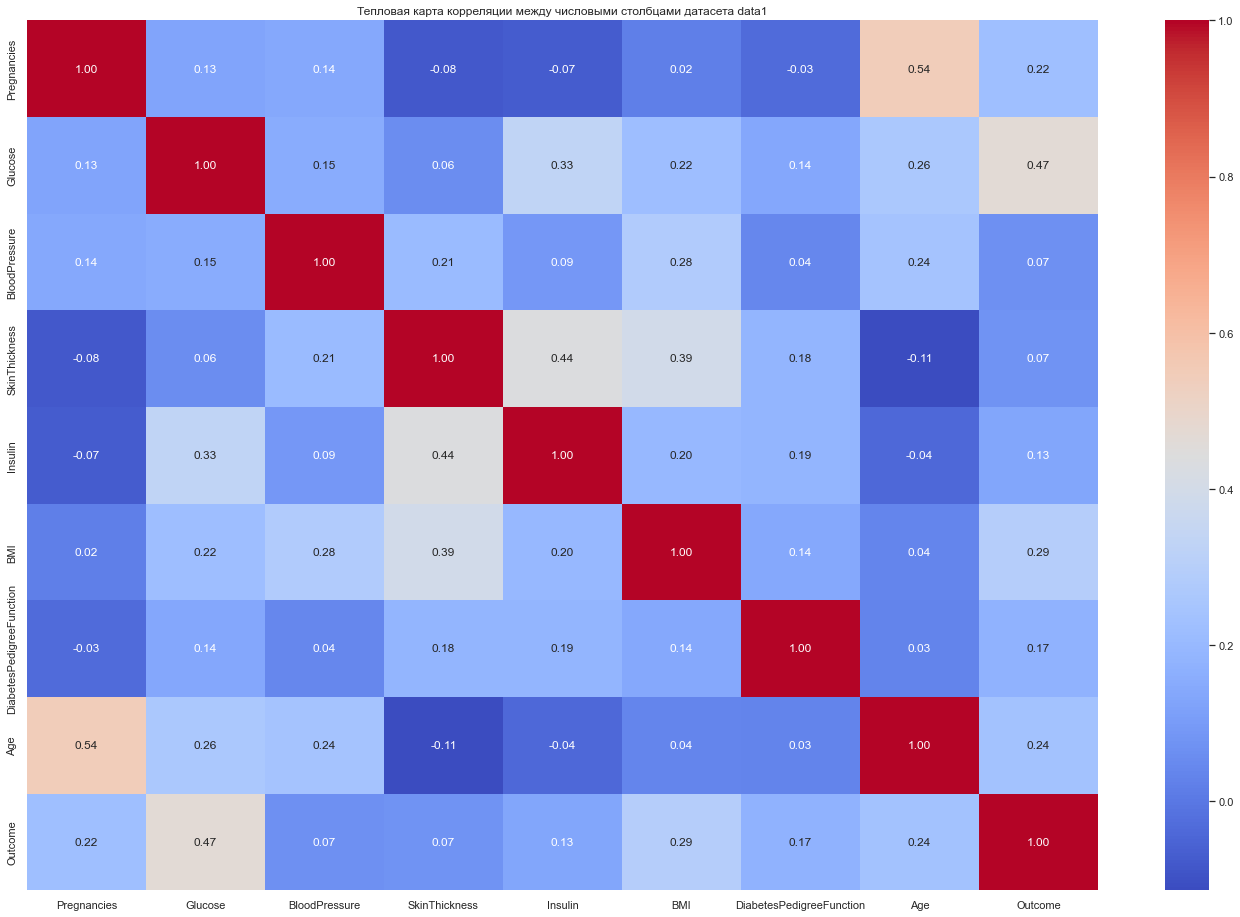

In [310]:
# Выбираем только числовые столбцы
def heatmap (data1: pd.DataFrame) -> None:
    """
    Строит тепловую карту датасета, для оценки корреляции столбов друг на друга

    Аргументы:
        data (pd.data1): Набор данных, для которого требуется вывести информацию.

    Возвращает:
        None
    """
    numeric_data = data1.select_dtypes(include=['float64', 'int64'])

    # Рассчитываем корреляцию
    correlation_matrix = numeric_data.corr()

    # Строим тепловую карту
    plt.figure(figsize=(24, 16))  # Размер графика
    sns.heatmap(
        correlation_matrix,
        annot=True,      # Показываем числовые значения корреляции
        fmt=".2f",       # Формат чисел
        cmap="coolwarm", # Цветовая схема
        cbar=True        # Отображение цветовой шкалы
    )
    plt.title("Тепловая карта корреляции между числовыми столбцами датасета data1")  # Заголовок
    plt.show()
heatmap (data1)

###### Исходя из предоставленной тепловой карты, можно сделать следующие выводы:

1) Глюкоза (Glucose):

    - Сильно коррелирует с наличием\отсутвием диабета (0.47).
    - Умеренная корреляция с BMI (0.33), что может свидетельствовать о взаимосвязи между индексом массы тела и уровнем глюкозы.
2) Возраст (Age):

    - Сильная корреляция с Pregnancies (0.54) - что логично, так как количество беременностей увеличивается с возрастом.
    - Слабая корреляция с диабетом (0.24), что может говорить о малом, но влиянии возраста на вероятность наличия диабета.
3) Индекс массы тела (BMI):

    - Умеренная корреляция с Glucose (Глюкоза) (0.33) и слабая с диабетом (0.29), что создает малую роль ожирения как фактора риска диабета.
4) Pregnancies (Количество беременностей):

    - Слабая корреляция с Outcome (0.22), что предполагает некоторую связь между количеством беременностей и диабетом (например, гестационный диабет, рассмотрим далее).
5) SkinThickness (Толщина кожной складки):

    - Сильная корреляция с Insulin (0.44), что указывает на связь между накоплением подкожного жира и уровнями инсулина.
6) Insulin:

    - Сильная корреляция с SkinThickness (0.44), но слабая корреляция с диабетом (0.13), что интересно, ибо количество инсулина - основной признак диабета по мнению медиков.
##### Общяя оценка:
Самые сильные корреляции с наличием/отсутвием диабета:
- Glucose (0.47) — основной предиктор.
- BMI (0.29) — важный, но менее значимый фактор.
- Age (0.24) и Pregnancies (0.22) — меньшая, но заметная связь.
Это создает гипотизу, что уровень глюкозы и индекс массы тела являются ключевыми факторами риска диабета в этом датасете.

## **Количество беременностей**

##### Количество беременностей может быть связано с риском развития диабета у женщины, особенно если речь идет о гестационном диабете (диабете, который развивается во время беременности) или диабете 2-го типа. Давайте рассмотрим ключевые аспекты:

1. <u>Гестационный диабет</u>

•	Повышенный риск с каждой беременностью: У женщин, которые пережили гестационный диабет, вероятность его повторения при последующих беременностях выше.

•	Долгосрочный риск: Гестационный диабет может повышать риск развития диабета 2-го типа после завершения беременности. Повторные эпизоды гестационного диабета могут усиливать этот риск.

2. <u>Гормональные изменения</u>

•	Во время беременности уровень гормонов (например, прогестерона и плацентарного лактогена) может снижать чувствительность к инсулину, что увеличивает нагрузку на поджелудочную железу. 

•   У женщин с предрасположенностью к диабету (например, из-за генетики, возраста или избыточного веса) этот эффект может усиливаться с увеличением количества беременностей.

3. <u>Факторы риска, связанные с многократными беременностями</u>

•	Избыточный вес: Повышение массы тела между беременностями может увеличить риск инсулинорезистентности.

•	Возраст: Каждая следующая беременность часто приходится на более старший возраст, а возраст является фактором риска диабета.

•	Проблемы с восстановлением организма: Частые беременности могут сокращать периоды восстановления, что влияет на общий метаболизм.

4. <u>Исследования</u>

Исследования показывают, что:

•	Женщины, у которых больше детей, могут иметь более высокий риск развития диабета 2-го типа, особенно если они набрали вес между беременностями или имели гестационный диабет.

•	Однако в семьях с большим количеством детей уровень физической активности матери может быть выше, что, наоборот, снижает риск диабета.


#### _Исходя из вышепредставленных фактов оценим первый датасет_

### _Гипотеза №1_ : Чем больше беременностей, тем выше риск. Мы должны получить прямопропорциональную зависимость между стобцами Pregnancies и Outcome 

<Figure size 720x432 with 0 Axes>

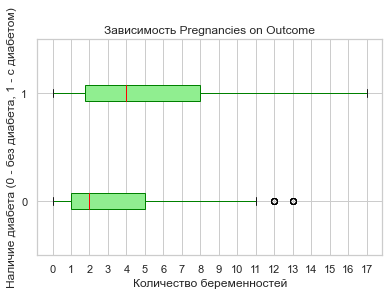

In [311]:
# Box plot для распределения наличия диабета зависимости от количества беременностей
plt.figure(figsize = (10, 6))
data1.boxplot(column = 'Pregnancies', by = 'Outcome', patch_artist=True, vert=False, 
           medianprops = dict(color = 'red'), 
           boxprops = dict(facecolor = 'lightgreen', color = 'green'),
           whiskerprops = dict(color = 'green'))

# Настройка графика
plt.title('Зависимость Pregnancies on Outcome')
plt.suptitle('')
plt.xlabel('Количество беременностей')
plt.ylabel('Наличие диабета (0 - без диабета, 1 - с диабетом)')

# При первом запуске, заметила, что ось x - дробная. Так как быть беременной 12,5 раз невозможно,
# добавлю принудительную корректировку оси x (Pregnancies)
max_pregnancies = data1['Pregnancies'].max()
plt.xticks(range(0, int (max_pregnancies) + 1)) # от 0 до максимума с шагом 1

# Отображение графика
plt.show()

##### _Что мы видим._
____________________________________________________________________________________
Зеленые прямоугольники - IQR (межквартильный размах 25-75 процентилей)

Красная линия - медиана

Усы - диапазон значений, который не считается выбросом

Черные точки - выбросы
____________________________________________________________________________________

1.1. У женщин без диабета медиана количества беременностей ниже (2 беременности).

1.2. У женщин с диабетом медиана выше (4 беременности).


2.1. У женщин без диабета IQR  меньше, большинство значений находятся в диапазоне 1-5 беременностей.

2.2. У женщин с диабетом IQR шире — от 2 до 8 беременностей.

Поговорим о выбросах:

3.1. У женщин без диабета есть несколько выбросов (женщины с 12-ю, 13-ю беременостями).

Общий тренд:

- У женщин с диабетом количество беременностей в среднем больше, чем у женщин без диабета.

**Вывод**:
Количество беременностей может быть связано с риском развития диабета. Женщины с бОльшим числом беременностей чаще попадают в группу с диабетом. 

Гипотеза подтвердилась.


#### _На секунду взглянем на выбросы_

In [312]:
# Выведем строки и посчитаем сколько женщин с более чем 10 беременностями не имеют диабет
pregnansy_filtr = data1[(data1['Outcome']==0)&(data1["Pregnancies"]>10)]
print (pregnansy_filtr)
print(f'Всего {len(pregnansy_filtr)} женщин')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
28            13      145             82             19      110  22.2   
36            11      138             76              0        0  33.2   
86            13      106             72             54        0  36.6   
274           13      106             70              0        0  34.2   
333           12      106             80              0        0  23.6   
358           12       88             74             40       54  35.3   
436           12      140             85             33        0  37.4   
518           13       76             60              0        0  32.8   
558           11      103             68             40        0  46.2   
559           11       85             74              0        0  30.1   
582           12      121             78             17        0  26.5   
658           11      127            106              0        0  39.0   
744           13      153             

#### _Стоит перейти к остальным признакам, дабы найти объяснение 14ти выбросам_

## **Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе**

##### Согласно рекомендациям ВОЗ и Американской диабетической ассоциации (ADA):
        •Нормальная толерантность к глюкозе: Концентрация через 2 часа < 140 mg/dL.

        •Нарушенная толерантность к глюкозе (преддиабет): Концентрация от 140 до 199 mg/dL.

        •Диабет: Концентрация ≥ 200.0 mg/dL.

Чем выше уровень глюкозы через 2 часа, тем больше риск развития диабета в будущем.

Высокая концентрация (≥ 200.0 mg/dL):

        •Указывает на значительное нарушение регуляции уровня сахара, типичное для диабета.

        •Это связано с долгосрочным повреждением сосудов, нервов и органов-мишеней (например, сердца, почек).


### _Гипотеза №2_: Женщин можно разделить на 3 группы по толерантности к глюкозе, и в групе где ≥ 200 mg/dL. - у всех будет диабет, а в группе  <140 mg/dL - диабета не будет



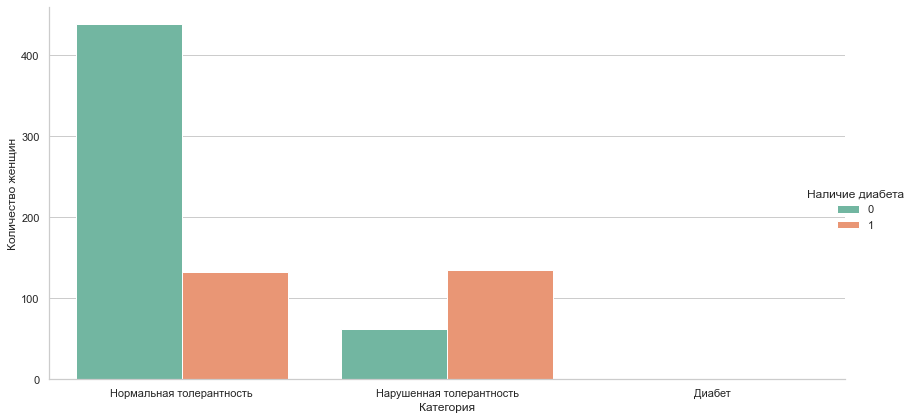

In [313]:
# Определяем границы для групп
bins = [0, 140, 200, float('inf')]  # 0 - 140 (нормальная толерантность), 140 - 199 (преддиабет), 200 - бесконечность (диабет)

# Определяем метки для каждой группы
labels = ['Нормальная толерантность', 'Нарушенная толерантность', 'Диабет']

# Разделяем данные на группы
data1['Категория'] = pd.cut(data1['Glucose'], bins=bins, labels=labels, right=False)

# Строим график с использованием catplot
sns.set(style="whitegrid")
g = sns.catplot(x='Категория', hue='Outcome', data=data1, kind="count", height=6, aspect=2, palette='Set2')

# Настройка графика
g.set_axis_labels('Категория', 'Количество женщин')
g.set_titles('Зависимость наличия диабета от категории глюкозы')
g.legend.set_title('Наличие диабета')


# Отображаем график
plt.show()

#### _Проанализируем график_

Так как в датасете максимальное значение уровня глюкозы - 199. Категория "Диабет" пуста.

Возможно мы выбрали неподходящую шкалу и использовалась шкала уровня глюкозы натощак, где границы иные:

        •Нормальная толерантность к глюкозе: Концентрация через 2 часа < 100 mg/dL.

        •Нарушенная толерантность к глюкозе (преддиабет): Концентрация от 100 до 125 mg/dL.

        •Диабет: Концентрация ≥ 126.0 mg/dL.

_Сделаем график для новой шкалы_


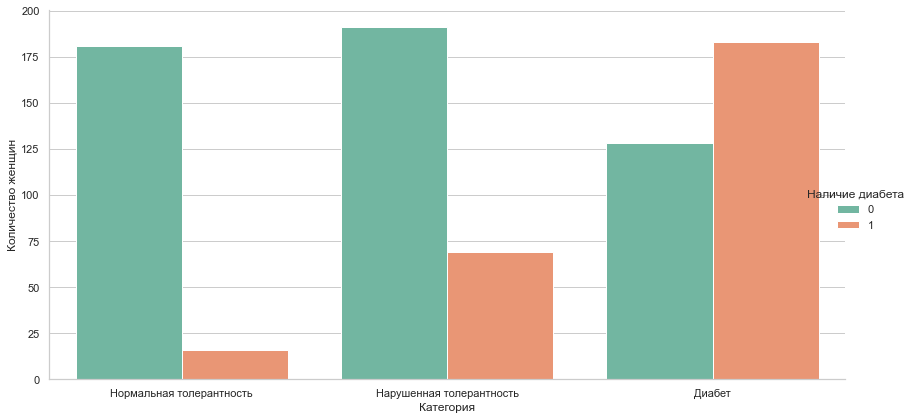

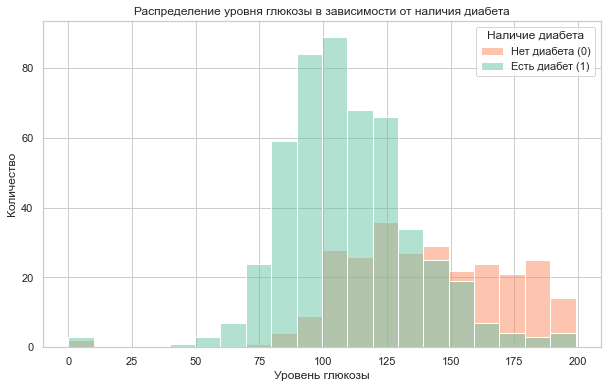

In [314]:
# Определяем границы для групп

bins = [0, 100, 125, float('inf')] 

# Определяем метки для каждой группы
labels = ['Нормальная толерантность', 'Нарушенная толерантность', 'Диабет']

# Разделяем данные на группы
data1['Категория'] = pd.cut(data1['Glucose'], bins=bins, labels=labels, right=False)

# Строим график с использованием catplot
sns.set(style="whitegrid")
g = sns.catplot(x='Категория', hue='Outcome', data=data1, kind="count", height=6, aspect=2, palette='Set2')

# Настройка графика
g.set_axis_labels('Категория', 'Количество женщин')
g.set_titles('Зависимость наличия диабета от категории глюкозы')
g.legend.set_title('Наличие диабета')


# Отображаем график
plt.show()

# Строим гистограмму с разделением по категории
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x='Glucose', hue='Outcome', bins=20, palette='Set2', kde=False)

# Настройка графика
plt.xlabel('Уровень глюкозы')
plt.ylabel('Количество')
plt.title('Распределение уровня глюкозы в зависимости от наличия диабета')
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])

plt.show()


2.1. Снова видим планомерный рост доли респондентов с дибабетом от первой до третьей категории. Это подтверждает мнение исследователей о прямой зависимости концентрации глюкозы в плазме крови через 2 часа с развитием диабета у пациентов

2.2. Интересно, что планомерное снижение женщин без диабета от категории к категории не происходит. Стоит продолжить исследование зависимости факторов от развития диабета.

2.3. Исходя из второго графика - гистограммы, в среднем, уровень глюкозы у не диабетиков подчиняется Гауссовому распределению и максимум находится на отметке 100 mg/dL - преддиабет (можно предположить что это особенность племени). В то время как у женщин с диабетом - все значения правее 100 mg/dL вплоть до значения 200 mg/dL, а максимум в 125 mg/dL.

Гипотеза подтвердилась не в полной мере. Предположительно нужно больше данных для объяснения особенности в племени - среднее значение глюкозы 100 mg/dL

_Давайте посмотрим на зависимость факторов "беременость" и "концентрация глюкозы..." друг от друга 

<Figure size 720x432 with 0 Axes>

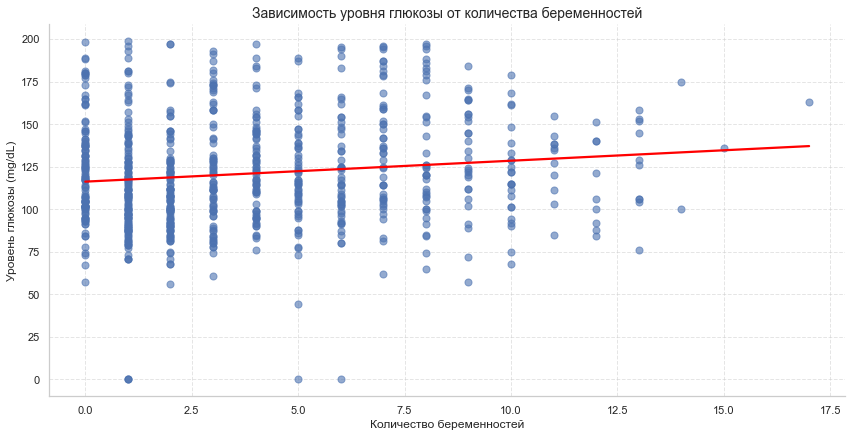

In [315]:

# Построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Pregnancies', 
    y='Glucose', 
    data = data1, 
    aspect=2, 
    height=6, 
    scatter_kws={'alpha': 0.6, 's': 50}, 
    line_kws={'color': 'red'},
    ci=None
)

# Настройка графика
plt.title('Зависимость уровня глюкозы от количества беременностей', fontsize=14)
plt.xlabel('Количество беременностей', fontsize=12)
plt.ylabel('Уровень глюкозы (mg/dL)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show() 

Исходя из визуализации данных нельзя сказать о прямой корреляции уровня глюкозы и количества беременностей. Стоит только отметить кучность точек в значениях концентрации глюкозы 100-140. Данные значения относятся к категории "Преддиабет". Причины данного факта, надеюсь станут ясными при дальнейшем изучении датасета.

Гипотеза **НЕ** подтвердилась.

## **Диастолическое артериальное давление**

##### Диастолическое артериальное давление (ДАД), которое отражает уровень давления крови в артериях между сердечными сокращениями, может оказывать влияние на развитие диабета у женщин, особенно через механизмы, связанные с метаболическим синдромом, сосудистыми заболеваниями и инсулинорезистентностью:

1. <u>Повышенное диастолическое давление (диастолическая гипертензия):</u>

o	Связь с инсулинорезистентностью:

- Высокое ДАД ассоциируется с инсулинорезистентностью, когда ткани организма хуже реагируют на инсулин. Это один из ключевых механизмов развития диабета 2-го типа.

o	Ухудшение функции сосудов:

-	Постоянно высокое диастолическое давление повреждает стенки сосудов, снижая кровоток в тканях, что может нарушать доставку глюкозы и усугублять метаболические нарушения.

o	Риск диабета:

-	Исследования показывают, что женщины с повышенным ДАД (например, > 90 мм рт. ст.) имеют более высокий риск развития диабета по сравнению с женщинами с нормальным давлением (≤ 80 мм рт. ст.).


2. <u>Нормальное или низкое диастолическое давление</u>

o	Низкое ДАД (< 60 мм рт. ст.) само по себе не связано с повышением риска диабета, но может быть маркером других патологий, таких как ухудшение сосудистого тонуса или гипотония. Эти состояния, в свою очередь, могут быть частью метаболических нарушений.

3. <u>Гендерные различия</u>

o	У женщин постменопаузального возраста влияние высокого артериального давления на развитие диабета может быть более выраженным из-за изменения гормонального фона (снижение уровня эстрогенов, которые защищают сосуды).

4. <u>Исследования</u>

o	Исследования показывают, что каждое повышение диастолического давления на 10 мм рт. ст. связано с увеличением риска диабета примерно на 10-15%, особенно у женщин с избыточной массой тела.

o	У женщин с гипертензией диабет встречается в 2-3 раза чаще, чем у женщин с нормальным артериальным давлением.



#### _Применим полученные знания для изучения датасета_

### _Гипотеза №3_: Женщин можно разделить на 3 группы - низкое,среднее и высокое давление и мы увидим увеличение инсулинорезистентности, а значит долю болеющих диабетом респондентов

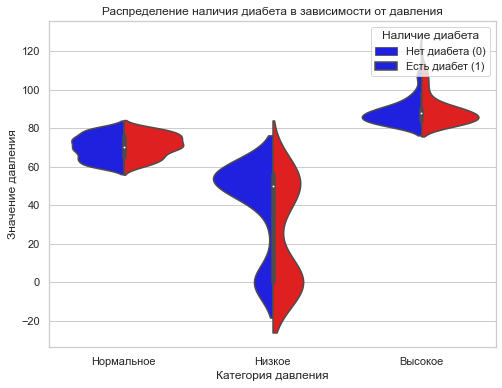

In [316]:
# Создание новой классификации давления
def categorize_pressure(pressure):
    if pressure < 60:
        return "Низкое"
    elif pressure <= 80:
        return "Нормальное"
    else:
        return "Высокое"

# Применяем функцию для классификации
data1.loc[: ,'Pressure Category'] = data1['BloodPressure'].apply(categorize_pressure)

# Строим violinplot
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
# в Пачке таким образом мне предложили бороться со странной передачей цвета у графиков, задавая собственные цветовые палетки
custom_palette = {0: 'blue', 1: 'red'}
sns.violinplot(x='Pressure Category', y='BloodPressure', hue='Outcome', data=data1, split=True, palette=custom_palette)

# Настройка графика
plt.title('Распределение наличия диабета в зависимости от давления')
plt.xlabel('Категория давления')
plt.ylabel('Значение давления')
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])

plt.show()

Во всех категориях давления можно увидеть значительное перекрытие между группами с диабетом и без диабета, что указывает на отсутвие однозначной зависимостии.

Гипотеза **НЕ** подтвердилась.

## **Толщина кожной складки трицепса**


1. <u>Индикатор общего уровня жировой ткани:</u>

o	Увеличенная СКТ обычно указывает на высокое количество жира в организме, что является важным фактором риска для развития диабета 2-го типа.

o	Подкожный жир, особенно в верхней части тела, может быть маркером более глубоких жировых отложений (например, висцерального жира), которые сильно ассоциируются с инсулинорезистентностью.

2. <u>Влияние на инсулинорезистентность</u>

o	Жировая ткань, особенно в избытке, выделяет провоспалительные цитокины (например, интерлейкин-6, фактор некроза опухолей альфа), которые ухудшают чувствительность тканей к инсулину.
o	Увеличение СКТ может быть косвенным индикатором системного воспаления и нарушения метаболизма глюкозы.

3. <u>Исследования</u>

o   Женщины с большей толщиной кожной складки имеют повышенный риск диабета, даже если их общий индекс массы тела (ИМТ) находится в пределах нормы. Это связано с тем, что распределение жира играет ключевую роль в метаболическом здоровье.
o	Женщины с СКТ, превышающей 20-25 мм, имеют значительно повышенный риск развития инсулинорезистентности, что часто является предшественником диабета 2-го типа.

### _Гипотеза №4_: Женщины с СКТ, превышабщий 20-25 мм, имеют диабет или преддиабет, а так же имеют высокий индекс массы тела 

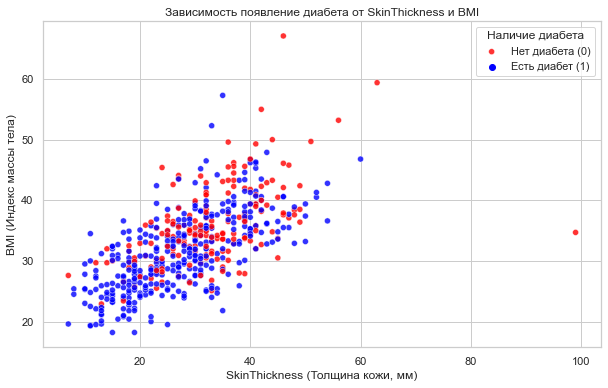

Группа людей с нормальными значениями BMI и Skin Thickness
Количество людей с диабетом: 11
Количество людей без диабета: 78
Группа людей с превышеющими норму значениями BMI и Skin Thickness
Количество людей с диабетом: 53
Количество людей без диабета: 74


In [317]:
# Снова очищу от 0 значения столбцов. 
# Но в этот раз объединю условия, создав датасет без нулей в обих столбцах
data1=data1[(data1['SkinThickness'] != 0) & (data1['BMI'] != 0)]

# в Пачке таким образом мне предложили бороться со странной передачей цвета у графиков, задавая собственные цветовые палетки
custom_palette = {0: 'blue', 1: 'red'}
# Построение scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SkinThickness',
    y='BMI',
    hue='Outcome',
    data=data1,
    palette=custom_palette,
    alpha=0.8
)

# Настройки графика
plt.title('Зависимость появление диабета от SkinThickness и BMI')
plt.xlabel('SkinThickness (Толщина кожи, мм)')
plt.ylabel('BMI (Индекс массы тела)')
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])
plt.grid(True)

# Отображение графика
plt.show()

#Сравним "плотность" людей с и без диабета в разных спорных областях scatterplot-a
# Условия фильтрации для "прямоугольника #1"
skin_thickness_range1 = (data1['SkinThickness'] >= 10) & (data1['SkinThickness'] <= 20) #
bmi_range1 = (data1['BMI'] >= 20) & (data1['BMI'] <= 30) #это значения BMI для "нормы" исходя из рекомендаций ВОЗ

# Применение фильтров
filtered_data1 = data1[skin_thickness_range1 & bmi_range1]

# Подсчет количества людей с и без диабета в прямоугольнике #1
count_diabetes1 = filtered_data1[filtered_data1['Outcome'] == 1].shape[0]
count_no_diabetes1 = filtered_data1[filtered_data1['Outcome'] == 0].shape[0]

# Вывод результатов
print('Группа людей с нормальными значениями BMI и Skin Thickness')
print(f"Количество людей с диабетом: {count_diabetes1}")
print(f"Количество людей без диабета: {count_no_diabetes1}")

# Условия фильтрации для "прямоугольника #2"
skin_thickness_range2 = (data1['SkinThickness'] >= 30) & (data1['SkinThickness'] <= 40)
bmi_range2 = (data1['BMI'] >= 30) & (data1['BMI'] <= 40) # это значения BMI для "Ожирения 1 и 2 степени" исходя из рекомендаций ВОЗ

# Применение фильтров
filtered_data2 = data1[skin_thickness_range2 & bmi_range2]

# Подсчет количества людей с и без диабета в прямоугольнике #1
count_diabetes2 = filtered_data2[filtered_data2['Outcome'] == 1].shape[0]
count_no_diabetes2 = filtered_data2[filtered_data2['Outcome'] == 0].shape[0]

# Вывод результатов
print('Группа людей с превышеющими норму значениями BMI и Skin Thickness')
print(f"Количество людей с диабетом: {count_diabetes2}")
print(f"Количество людей без диабета: {count_no_diabetes2}")




_Сообщение для проверяющего: я не знаю почему при заданных цветах он поменял в легенде их местами. В коде я прописываю 1 (наличие диабета) - красный, но в легенде это становится синим. Без понятия как это менять_

1.1. Набллюдается прямопропорциональная зависимость между толщиной кожной складки и индексом массы тела. Увеличение значения Skin Thickness связано с ростом BMI и наоборот как у пациентов с диабетом, так и без него

2.1. Пациенты с диабетом (красные точки) чаще встречаются в областях с высокими значениями SkinThickness (более 30 мм) и BMI (более 35).

2.2. В областях с нормальными значениями BMI и Skin Thickness **соотношение пациентов  с и без диабета - 8 на 57**,  в то время как в "прямоугольнике" превышающем норму показателей уже - **36 на 47**. 

Это подтвержадет гипотезу.

## **2-часовой сывороточный инсулин**

##### Двухчасовой сывороточный инсулин, измеряемый через 2 часа после перорального теста на толерантность к глюкозе (ОГТТ), является важным показателем метаболического здоровья и может существенно влиять на развитие диабета у женщин.

1. <u>Нормальный ответ на глюкозу:</u>

o	После приема глюкозы организм выделяет инсулин, чтобы способствовать усвоению глюкозы клетками.

o	Через 2 часа уровни глюкозы и инсулина должны вернуться к норме, если метаболизм работает корректно.


2. <u>Повышенный уровень инсулина (гиперинсулинемия):</u>

o	Если двухчасовой инсулин остается высоким, это может быть признаком инсулинорезистентности.

o	При инсулинорезистентности клетки хуже реагируют на инсулин, заставляя поджелудочную железу вырабатывать больше инсулина, чтобы компенсировать этот дефект.

o	Со временем это состояние может привести к истощению β-клеток поджелудочной железы, что увеличивает риск диабета 2-го типа.

3. <u>Снижение уровня инсулина (гипоинсулинемия):</u>

o	У женщин с уже развившейся диабетической дисфункцией β-клеток двухчасовой инсулин может быть аномально низким.

o	Это указывает на недостаточную секрецию инсулина для регулирования уровня глюкозы, что является характерным для диабета.

3. <u>Исследования</u>

•	Повышенный инсулин и преддиабет:

- Женщины с повышенным двухчасовым инсулином находятся в группе риска развития диабета, даже если их уровень глюкозы в норме (состояние называется компенсированной инсулинорезистентностью).

•	Низкий инсулин и манифест диабета:

- Низкий двухчасовой инсулин коррелирует с более поздними стадиями диабета, когда β-клетки не могут компенсировать нарушение чувствительности к инсулину.

•	Пороговые значения:

- Уровни двухчасового сывороточного инсулина, превышающие 40-50 мкЕд/мл, обычно сигнализируют о высокой вероятности инсулинорезистентности и риска диабета.


### _Гипотеза №5_: Пациенты, у которых уровень двухчасового сывороточного инсулина превышает пороговые значения (40-50 мкЕд\мл), имеют так же высокую концентрацию глюкозы в крови. 

**Стоит помнить про вероятные выбросы - У женщин с уже развившейся диабетической дисфункцией β-клеток двухчасовой инсулин может быть аномально низким.**

Средняя глюкоза при Insulin > 50: 125.98
Средняя глюкоза при Insulin <= 50: 92.26


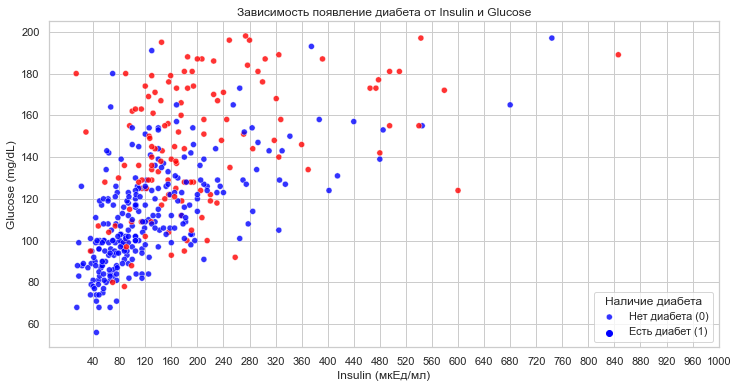

In [318]:
# Снова очищу от 0 значения столбцов. 
# Но в этот раз объединю условия, создав датасет без нулей в обих столбцах
data1=data1[(data1['Insulin'] != 0) & (data1['Glucose'] != 0)]

# Разделение на группы и вычисление статистик
high_insulin = data1[data1['Insulin'] > 50]['Glucose'].mean()
low_insulin = data1[data1['Insulin'] <= 50]['Glucose'].mean()
print(f"Средняя глюкоза при Insulin > 50: {high_insulin:.2f}")
print(f"Средняя глюкоза при Insulin <= 50: {low_insulin:.2f}")

# в Пачке таким образом мне предложили бороться со странной передачей цвета у графиков, задавая собственные цветовые палетки
custom_palette = {0: 'blue', 1: 'red'}
# Построение графика
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Insulin',
    y='Glucose',
    hue='Outcome',
    data=data1,
    palette=custom_palette,
    alpha=0.8
)

# Настройки графика
plt.title('Зависимость появление диабета от Insulin и Glucose')
plt.xlabel('Insulin (мкЕд/мл)')
plt.ylabel('Glucose (mg/dL)')
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])
plt.grid(True)

# Настройка меток оси X с шагом 40
plt.xticks(ticks=range(40, 1001, 40))

# Отображение графика
plt.show()

1.1. На графике отчетливо видно (красные точки - есть дибет, синие - нет, почему в легенде он не хочет это корректно отражать я не знаю) что почти все женщины с диабетом превышают пороговое значение инсулина в 50 мкЕд/мл
1.2. Но мы имеем 3 выброса, один из котрых экстремально минимален по инсулину (причина этого объясняется выше), но имеет повышенное значение Глюкозы.

2.1. Можно связать прямопропорциональной зависимостью параметры Glucose и Insulin опираясь на график, а так же исходя из расчета средней глюкозы выше и ниже порогового значения инсулина - 126 и 92 соответсвенно.

Гипотеза подтвердилась.





## **Функция предрасположенности к диабету**

##### Функция предрасположенности к диабету (Diabetes Pedigree Function, DPF) — это индекс, используемый для оценки вероятности развития диабета на основе семейной истории заболевания и наследственных факторов. Эта функция была впервые введена в исследовании Pima Indians Diabetes Dataset, чтобы учитывать влияние генетической предрасположенности на риск диабета.

1. <u>Что учитывает DPF?</u>

•	Семейную историю диабета: Наличие диабета у ближайших родственников (родителей, братьев, сестер) увеличивает значение DPF.

•	Возраст родственников, заболевших диабетом: Чем раньше родственник заболел диабетом, тем выше показатель DPF.

•	Степень родства: Ближайшие родственники (родители) имеют больший вес в расчете DPF по сравнению с дальними родственниками.


2. <u>Роль DPF в развитии диабета</u>

•	Высокая DPF (>0.5): Указывает на значительное генетическое влияние, особенно в сочетании с другими факторами риска (например, ожирение или низкая физическая активность).

•	Низкая DPF (<0.5): Указывает на слабую роль наследственности, но не исключает развитие диабета из-за других факторов, таких как образ жизни.


3. <u>Что говорт DPF о здоровье женщины?</u>

•	Беременность и гестационный диабет: Женщины с высокой DPF имеют повышенный риск развития гестационного диабета, который часто переходит в диабет 2-го типа.

•	Гормональные изменения: Женщины с генетической предрасположенностью к диабету более подвержены влиянию гормональных изменений, таких как снижение уровня эстрогенов после менопаузы.

•	Взаимодействие с ожирением: Высокая DPF в сочетании с избыточным весом усиливает риск диабета, так как оба фактора взаимно усиливают инсулинорезистентность.


3. <u>Как интерпретировать DPF в анализе?</u>

•	DPF как индикатор риска: Высокий DPF сам по себе не вызывает диабет, но является индикатором высокого риска.

•	DPF как часть модели риска: Он используется в сочетании с другими переменными, такими как индекс массы тела, уровень глюкозы и артериальное давление, чтобы оценить вероятность развития диабета.




### _Гипотеза №5_: Пациенты с низким DFM, и нормальным индексом тела в меньшей степени подвержены диабету, чем женщины с высоким DFM и высоким индексом тела. 

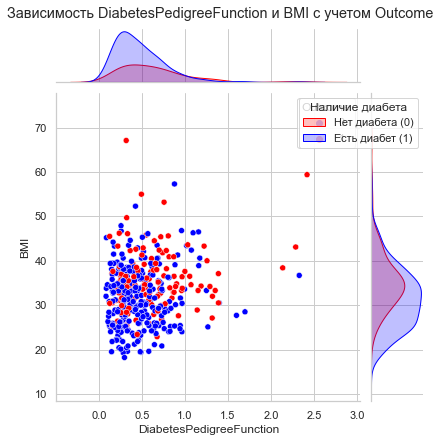

In [319]:
# Удалим строки с нулевыми значениями в столбцах DiabetesPedigreeFunction и BMI
filtered_data = data1[(data1['DiabetesPedigreeFunction'] != 0) & (data1['BMI'] != 0)]

custom_palette = {0: 'blue', 1: 'red'}
# Построение графика 
sns.jointplot(
    data=filtered_data,
    x="DiabetesPedigreeFunction",
    y="BMI",
    hue="Outcome",
    kind="scatter", 
    palette=custom_palette
)

# Настройка заголовка и легенды

plt.suptitle('Зависимость DiabetesPedigreeFunction и BMI с учетом Outcome', y=1.02)
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])

# Показать график
plt.show()

_Сообщение для проверяющего: я не знаю почему при заданных цветах он поменял в легенде их местами. В коде я прописываю 1 (наличие диабета) - красный, но в легенде это становится синим. Без понятия как это менять_

1.1. Большинство людей с диабетом (красные точки) имеют значение DiabetesPedigreeFunction выше 0.5 и BMI выше 30, что соответствует состоянию ожирения.

1.2. Люди без диабета (синие точки) в основном имеют более низкие значения DiabetesPedigreeFunction и BMI, что видно по пику плотности на волновых графиках.

1.3. Если рассмотреть только боковые кривые, можно сделать вывод, что в среднем у людей с диабетом значение DPF и BMI выше, что видно по максимам графика. Максимум сдвинут относительно максимума синей линии к бОльшим значениям.

1.4. Стоит отметить некоторое перекрытие между распределениями людей с диабетом и без него, что указывает на наличие других факторов, влияющих на развитие диабета, помимо семейной предрасположенности и ожирения.

1.5. Так же у нас есть много выбросов пациентов с высокими показателями параметров, но здоровых.

Гипотеза подтвердилась.


## **Возраст**

### _Гипотеза №5_: Чем старше пациенты, тем большее их число болеет диабетом. 

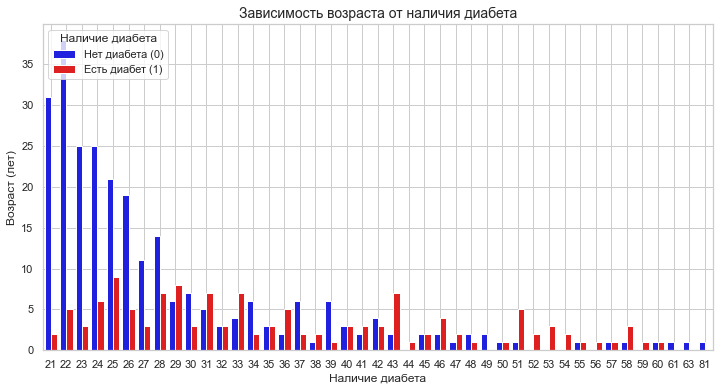

In [320]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Age',
    hue = 'Outcome',
    data=data1, 
    palette={0: 'blue', 1: 'red'},
    dodge = True
)

plt.title('Зависимость возраста от наличия диабета', fontsize=14)
plt.xlabel('Наличие диабета', fontsize=12)
plt.ylabel('Возраст (лет)', fontsize=12)
plt.legend(title='Наличие диабета', labels=['Нет диабета (0)', 'Есть диабет (1)'])
plt.grid(True)


plt.show()

1.1. Среди пациентов до 28 лет диабет редкое явление, но с 29 лет вероятность появления диабета растет. 

1.2. С 51 года почти у всех женщин диабет.

1.3. Не стоит игнорировать пожилых пациентов (7 чел.) без диабета. 

Гипотеза подвердилась, но частично. Женщины в молодом возрасте болеют диабетом реже чем пожилые люди, но мы имеем значительное число выбросов.

# Краткий анализ первого датасета окончен. Мы дополним его вторых датасетом

Для этого необходимо распаковать и проанализировать второй датафрейм.

В zip файле их два. Распакуем по-отдельности.


In [321]:
test = pd.read_csv('data/test.csv')
data2 = test.copy ()
train = pd.read_csv('data/train.csv')
data3 = train.copy ()
display(data2.head())
display(data3.head()) # Выведем первые 5 строк 


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Информация из сопроводительной информации к базе данных и первичная оценка:
 Целью данного исследования является выявление наиболее значимых факторов риска сердечно-сосудистых заболеваний, а также прогнозирование общего риска с использованием логистической регрессии
### База данных состоит из столбцов:
0. id - номер респондента
 
Демографические данные:
1. Age: Возраст пациента
2. education: Какая-нибудь средняя школа (1), лицей/ GED (2), какой-нибудь колледж/профессионально-техническое училище (3), колледж (4)
3. Sex: мужчина или женщина ("M" или "F")
4. is_smoking: является ли пациент курильщиком в настоящее время ("ДА" или "НЕТ")
5. Количество сигарет в день: количество сигарет, выкуриваемых пациентом в среднем за один день.(можно считать непрерывным, так как можно выкурить любое количество сигарет, даже половину сигареты.)

Медицинские данные (анамнез)

6. Лекарства от артериального давления: принимал ли пациент лекарства от артериального давления (номинальные) или нет.

7. Распространенный инсульт: был ли у пациента ранее инсульт или нет (номинальный)

8. Распространенная артериальная гипертензия: был ли у пациента гипертонический синдром (номинальный)

9. Сахарный диабет: был ли у пациента сахарный диабет (номинальный)

Состояние здоровья (текущее)

10. Общий уровень холестерина (постоянно)

11. Системное АД: систолическое артериальное давление (постоянно)

12. Диастолическое артериальное давление (постоянно)

13. ИМТ: Индекс массы тела (постоянно)

14. Частота сердечных сокращений: частота сердечных сокращений (непрерывная) - В медицинских исследованиях такие переменные, как частота сердечных сокращений, хотя на самом деле и дискретны, но считаются непрерывными из-за большого количества возможных значений.

15. Глюкоза: уровень глюкозы (непрерывный)

Прогнозируемая переменная (желаемый целевой показатель)

16. 10-летний риск развития ишемической болезни сердца (двоичный код: “1” означает “Да”, “0” означает “Нет”)

### Получим чуть больше информации о столбцах таблицы. Так же оценим объем выборки

In [322]:
summary(data2)


В таблице (848, 16) строк и столбцов соответственно
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64

In [323]:
summary(data3)

В таблице (3390, 17) строк и столбцов соответственно
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYear

- Во-первых, количество столцов отличается, во третьем датасете есть 17ый по порядку столбец - TenYearCHD, которого нет в первом
- Во-вторых, признаки кодируются не корректными типами данных. education,cigsPerDay, BPMeds, heartRate, glucose  без надобности задаются числом с плавающей точкой. Для данных стобцов больше подойдет int64.
- В-третьих, есть non-null значения у обоих датасетов. Удалять полностью всю стрку не разумно. Присвоим None иные значения

Решим все эти проблемы, перед объединением их друг с другом.

In [324]:
# Присвоим всем значениям NaN новые значения, исходя из логики столбца
# Например для education подойдет 0, а для cigsPerDay -1, чтобы была возможность отсортировать эти значения в будущем
data2_new = data2.fillna ({'education':0, 'cigsPerDay': -1, 'BPMeds':-1, 'totChol':0, 'BMI': 0, 'glucose':0})
data3_new = data3.fillna ({'education':0, 'cigsPerDay': -1, 'BPMeds':-1, 'totChol':0, 'BMI': 0, 'heartRate':0, 'glucose':0})

# Для каждого "проблемного" столбца преобразуем данные 
data2_new['education'] = data2_new['education'].astype('int64')
data2_new['cigsPerDay'] = data2_new['cigsPerDay'].astype('int64')
data2_new['BPMeds'] = data2_new['BPMeds'].astype('int64')
data2_new['heartRate'] = data2_new['heartRate'].astype('int64')
data2_new['glucose'] = data2_new['glucose'].astype('int64')
data2_new['totChol'] = data2_new['totChol'].astype('int64')
data3_new['education'] = data3_new['education'].astype('int64')
data3_new['cigsPerDay'] = data3_new['cigsPerDay'].astype('int64')
data3_new['BPMeds'] = data3_new['BPMeds'].astype('int64')
data3_new['heartRate'] = data3_new['heartRate'].astype('int64')
data3_new['glucose'] = data3_new['glucose'].astype('int64')
data3_new['totChol'] = data3_new['totChol'].astype('int64')

# Выводим результат работы 
data2_new.info()
data3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        848 non-null    int64  
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       848 non-null    int64  
 6   BPMeds           848 non-null    int64  
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          848 non-null    int64  
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              848 non-null    float64
 14  heartRate        848 non-null    int64  
 15  glucose          848 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 106.1+ KB
<c

Датасеты очищены, можно объединять

In [325]:
# Объединение двух DataFrame
uni_data2: pd.DataFrame = pd.concat([data2_new, data3_new])

"""
Объединяет два DataFrame, data2_new и data3_new, с использованием pd.concat.
Затем отображает объединенный DataFrame и выводит его информацию.

Функция выполняет следующие действия:
1. Объединяет два DataFrame по вертикали (добавляет строки из data3_new к data2_new).
2. Отображает объединенные данные с помощью display.
3. Выводит общую информацию о DataFrame с помощью info, включая количество строк, столбцов и типы данных.

Возвращает:
    None: Функция не возвращает значений. Она только изменяет глобальную переменную uni_data2, которая содержит объединенные данные.
"""


# Вывод информации о DataFrame
summary (uni_data2)


В таблице (4238, 17) строк и столбцов соответственно
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4238 non-null   int64  
 6   BPMeds           4238 non-null   int64  
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4238 non-null   int64  
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4238 non-null   float64
 14  heartRate        4238 non-null   int64  
 15  glucose          4238 non-null   int64  
 16  TenYear

Уберем NaN, подкорректируем данные, отсортируем по id и уберем дупликаты (если они есть)

In [333]:
uni_data2 = uni_data2.fillna ({'TenYearCHD': -1}) # Убрали NaN
uni_data2 = uni_data2.drop_duplicates(subset = ['id']) # убираем дупликаты по id
uni_data2 = uni_data2.sort_values('id') # Сортируем по id

# Преобразуем стобцы sex и is_smoking в числовой формат.
uni_data2['sex'] = uni_data2['sex'].apply(lambda x: 0 if x=='F' else 1)
uni_data2['is_smoking'] = uni_data2['is_smoking'].apply(lambda x: 0 if x=='NO' else 1)
uni_data2['sex'] = uni_data2['sex'].astype('int64')
uni_data2['is_smoking'] = uni_data2['is_smoking'].astype('int64')

# Логично, что у людей с cigsPerDay > 0 в графе is_smoking должно быть YES (т.е 1)
uni_data2.loc[uni_data2['cigsPerDay'] > 0, 'is_smoking'] = 1
uni_data2.loc[uni_data2['cigsPerDay'] == 0, 'is_smoking'] = 0

display(uni_data2.head(10))
display(uni_data2.tail(10))

,SkinThickness,Категория,glucose,BPMeds,is_smoking,TenYearCHD,Pressure Category,diabetes,id,sex,...,cigsPerDay,Pregnancies,education,Insulin,age,prevalentStroke,diaBP,BMI,BloodPressure,totChol
0,NaN,NaN,80,0,1,1,NaN,0,0,1,...,3,NaN,2,NaN,64,0,85.0,0.00,NaN,221
1,NaN,NaN,75,0,0,0,NaN,0,1,1,...,0,NaN,4,NaN,36,0,98.0,29.77,NaN,212
2,NaN,NaN,94,0,1,0,NaN,0,2,1,...,10,NaN,1,NaN,46,0,71.0,20.35,NaN,250
3,NaN,NaN,94,0,1,1,NaN,0,3,1,...,20,NaN,1,NaN,50,0,88.0,28.26,NaN,233
4,NaN,NaN,77,0,1,0,NaN,0,4,1,...,30,NaN,1,NaN,64,0,85.0,26.42,NaN,241
5,NaN,NaN,65,0,0,1,NaN,0,5,1,...,0,NaN,3,NaN,61,0,121.0,32.80,NaN,272
6,NaN,NaN,79,0,0,0,NaN,0,6,1,...,0,NaN,1,NaN,61,0,136.0,24.83,NaN,238
7,NaN,NaN,63,0,1,0,NaN,0,7,1,...,35,NaN,4,NaN,36,0,68.0,28.15,NaN,295
8,NaN,NaN,79,-1,1,0,NaN,0,8,1,...,20,NaN,2,NaN,41,0,78.0,20.70,NaN,220
9,NaN,NaN,0,0,0,0,NaN,0,9,1,...,0,NaN,2,NaN,55,0,81.0,25.71,NaN,326


,SkinThickness,Категория,glucose,BPMeds,is_smoking,TenYearCHD,Pressure Category,diabetes,id,sex,...,cigsPerDay,Pregnancies,education,Insulin,age,prevalentStroke,diaBP,BMI,BloodPressure,totChol
838,NaN,NaN,60,0,0,-1,NaN,0,4228,1,...,0,NaN,0,NaN,47,0,103.5,27.12,NaN,279
839,NaN,NaN,70,0,0,-1,NaN,0,4229,1,...,0,NaN,1,NaN,47,0,96.0,27.86,NaN,278
840,NaN,NaN,79,0,0,-1,NaN,0,4230,1,...,0,NaN,1,NaN,67,0,74.0,15.54,NaN,203
841,NaN,NaN,67,0,1,-1,NaN,0,4231,1,...,20,NaN,1,NaN,62,0,87.5,23.88,NaN,270
842,NaN,NaN,83,0,1,-1,NaN,0,4232,1,...,4,NaN,3,NaN,49,0,91.0,24.30,NaN,227
843,NaN,NaN,77,0,0,-1,NaN,0,4233,1,...,0,NaN,3,NaN,46,0,77.5,27.42,NaN,277
844,NaN,NaN,70,0,0,-1,NaN,0,4234,1,...,0,NaN,2,NaN,58,0,67.0,23.08,NaN,190
845,NaN,NaN,0,0,0,-1,NaN,0,4235,1,...,0,NaN,1,NaN,55,0,80.0,26.41,NaN,199
846,NaN,NaN,92,0,0,-1,NaN,0,4236,1,...,0,NaN,3,NaN,45,0,104.5,22.86,NaN,231
847,NaN,NaN,79,0,1,-1,NaN,0,4237,1,...,25,NaN,0,NaN,56,0,80.0,23.44,NaN,255


In [327]:
uni_data2 ['TenYearCHD'] = uni_data2 ['TenYearCHD'].astype('int64') # Изменим данные в столбце TenYearCHD
summary(uni_data2)

В таблице (4238, 17) строк и столбцов соответственно
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 847
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   sex              4238 non-null   int64  
 4   is_smoking       4238 non-null   int64  
 5   cigsPerDay       4238 non-null   int64  
 6   BPMeds           4238 non-null   int64  
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4238 non-null   int64  
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4238 non-null   float64
 14  heartRate        4238 non-null   int64  
 15  glucose          4238 non-null   int64  
 16  TenYearC

### Настало время объединить uni_data2 с первым датасетом data1


1) Обратим внимание на столбцы с одинаковой информацией - BMI, Age, Outcome и diabetes

2) glucose и Glucose - это столбцы с разной информацией, но я их объединю, ибо в рамках этого анализа данных, нюанс получения этих данных не критичен. Если уровень глюкозы всегда высокий, то он будет высоким и во время 2ух часовго теста. 

In [328]:
# Приведение названий дублирующих столбцов к формату второго датасета (большего)
data1.rename(columns={
    "Age": 'age',
    "Glucose": "glucose",  
    "Outcome": "diabetes"  
}, inplace=True)

# Заполняем отсутствующие столбцы в обоих датасетах NaN, чтобы их можно было сложить
common_columns = set(uni_data2.columns).union(set(data1.columns))
uni_data2 = uni_data2.reindex(columns=common_columns)
data1 = data1.reindex(columns=common_columns)
# 


# Объединяем оба датасета по вертикали
firts_merged_dataset = pd.concat([uni_data2, data1], ignore_index=True)

# Проверяем итоговый результат
firts_merged_dataset_info = {
    "head": firts_merged_dataset.head(),
    "columns": firts_merged_dataset.columns.tolist(),
    "shape": firts_merged_dataset.shape
}
firts_merged_dataset.info()
print (firts_merged_dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SkinThickness             392 non-null    float64
 1   Категория                 392 non-null    object 
 2   glucose                   4630 non-null   int64  
 3   BPMeds                    4238 non-null   float64
 4   is_smoking                4238 non-null   float64
 5   TenYearCHD                4238 non-null   float64
 6   Pressure Category         392 non-null    object 
 7   diabetes                  4630 non-null   int64  
 8   id                        4238 non-null   float64
 9   sex                       4238 non-null   float64
 10  DiabetesPedigreeFunction  392 non-null    float64
 11  prevalentHyp              4238 non-null   float64
 12  sysBP                     4238 non-null   float64
 13  heartRate                 4238 non-null   float64
 14  cigsPerD

Для дальнейшего анализа меня интересуют столбцы age, BMI, glucose, diabetes. Исходя из выведенной информации NaN в них нет. 

# Проанализируем, какие факторы связаны с развитием диабета, а какие нет. Исходя уже из расширенных данных.



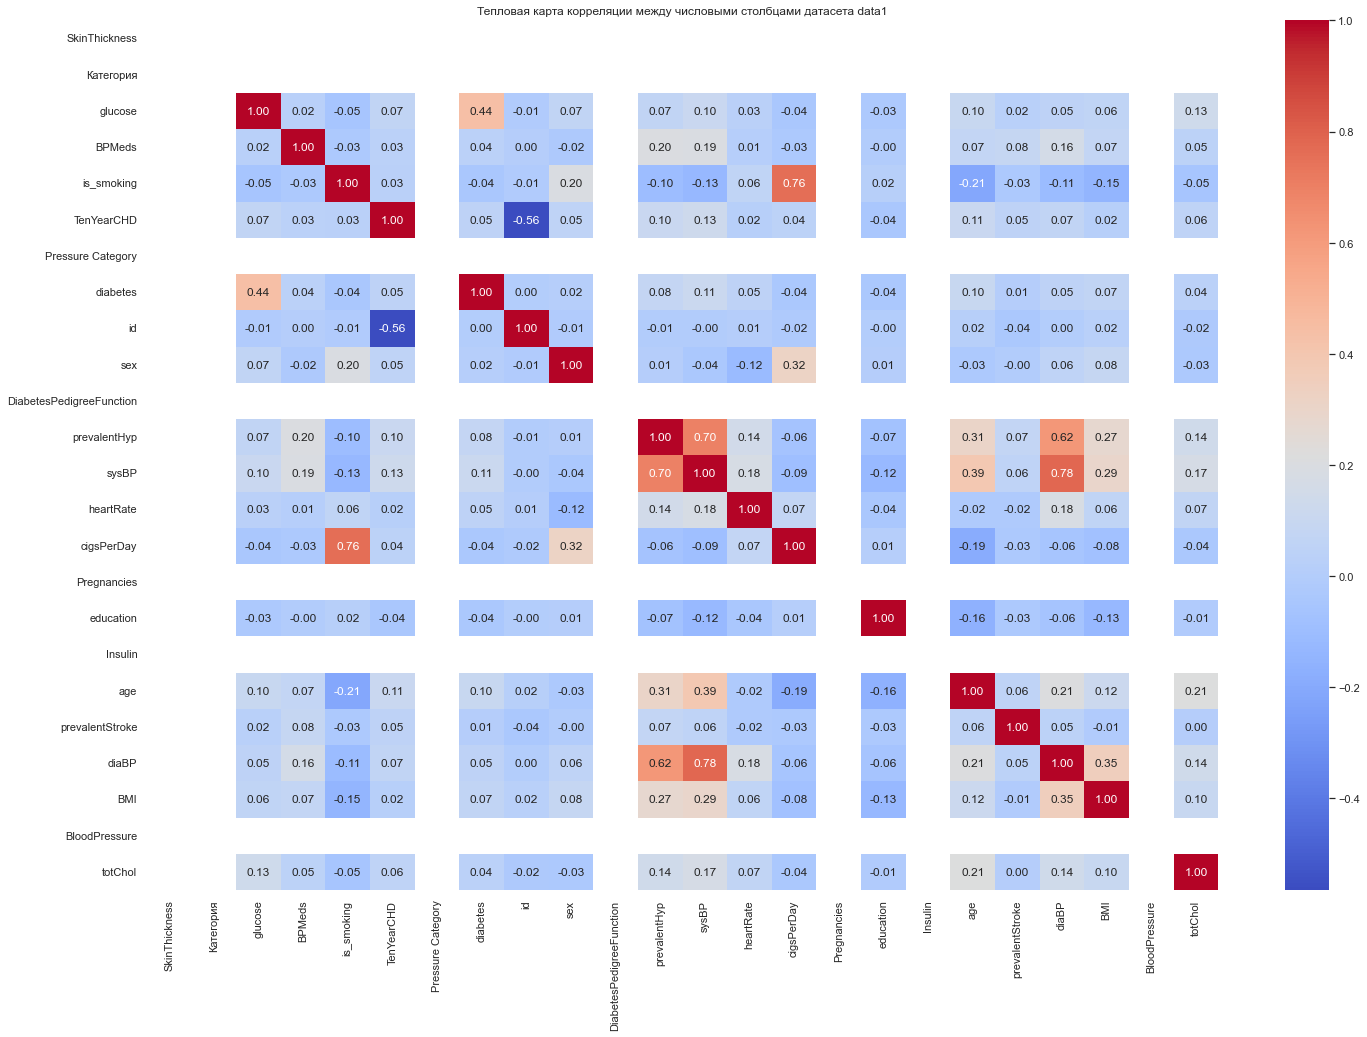

In [329]:
heatmap (uni_data2)

##### Посмотрим влияние Глюкозы и возраста на возникновение диабета

### _Гипотеза №6_: Чем старше пациенты, тем большее их число болеет диабетом. 

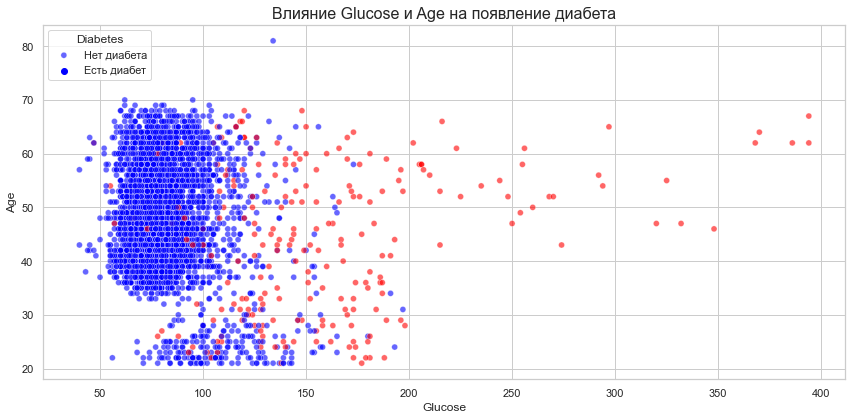

In [330]:
# Убираем строки где Age и glucose = 0
firts_merged_dataset = firts_merged_dataset[(firts_merged_dataset['age'] > 0) & (firts_merged_dataset['glucose'] > 0)]

# Настройки графика
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=firts_merged_dataset,
    x='glucose',
    y='age',
    hue='diabetes',  # Цветовая шкала на основе наличия диабета (0 или 1)
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)

# Настройки осей и заголовка
plt.title('Влияние Glucose и Age на появление диабета', fontsize=16)
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Diabetes', loc='upper left', labels=['Нет диабета', 'Есть диабет'])
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

1.1. С многократным увеличением среза данных мы получаем яркую картину прямой заисимости увеличенной концентрации глюкозы в крови и наличием диабета у респондентов. 

1.2. Но по этому графику нельзя однозначно сказать что с увеличением возраста доля диабетиков растет. Смена цвета у нас идет как по горизонтали, так и на искосок, но при этом внутри одного значения глюкозы нет четкой смены цвета. 

### _Гипотеза №7_: Пациенты с высоким BMI чаще больны диабетом, чем с низким

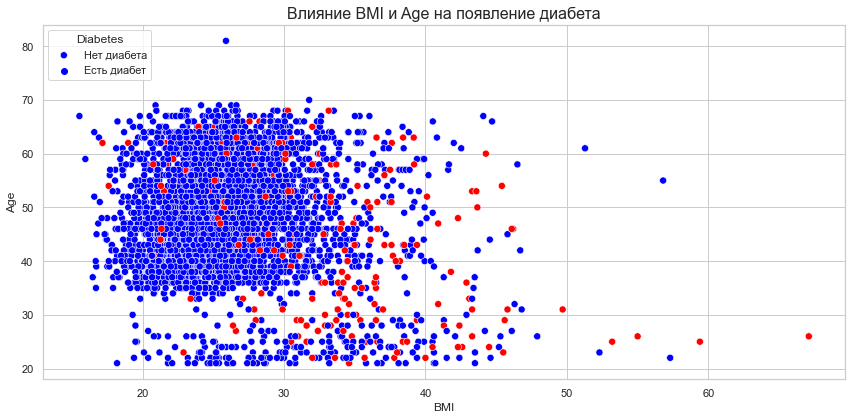

In [331]:
# Убираем строки где Age и glucose = 0
firts_merged_dataset = firts_merged_dataset[(firts_merged_dataset['age'] > 0) & (firts_merged_dataset['BMI'] > 0)]

# Настройки графика
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=firts_merged_dataset,
    x = 'BMI',
    y = 'age',
    hue = 'diabetes',  # Цветовая шкала на основе наличия диабета (0 или 1)
    palette = {0: 'blue', 1: 'red'},
    alpha = 1,
    s = 50
)

# Настройки осей и заголовка
plt.title('Влияние BMI и Age на появление диабета', fontsize=16)
plt.xlabel('BMI', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.legend(title='Diabetes', loc='upper left', labels=['Нет диабета', 'Есть диабет'])
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()

1.1. И снова с многократным увеличением среза данных мы получаем яркую картину прямой заисимости повышенной BMI и наличием диабета у респондентов. 

1.2. Но по этому графику нельзя однозначно сказать что с увеличением возраста доля диабетиков растет. Смена цвета у нас идет как по горизонтали, так и на искосок, но при этом внутри одного значения BMI нет четкой смены цвета. 


Мне стало интересно, зависит ли диабет от курения. Посмотрим, есть ли корреляция

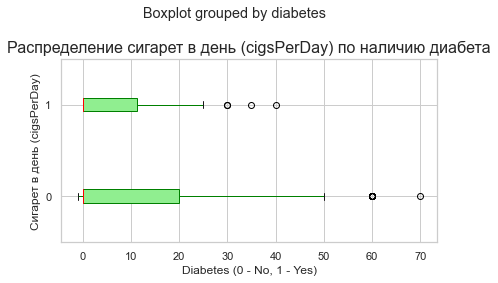

In [332]:
# Удаление строк с NaN в cigPerDay, ибо с ними мы ничего не получим
merged_dataset_clean = firts_merged_dataset.dropna(subset=['cigsPerDay'])




# Построение boxplot
merged_dataset_clean.boxplot(column = 'cigsPerDay', by = 'diabetes', patch_artist=True, vert=False, 
           medianprops = dict(color = 'red'), 
           boxprops = dict(facecolor = 'lightgreen', color = 'green'),
           whiskerprops = dict(color = 'green'))

# Настройки осей и заголовка
plt.title('Распределение сигарет в день (cigsPerDay) по наличию диабета', fontsize=16)
plt.xlabel('Diabetes (0 - No, 1 - Yes)', fontsize=12)
plt.ylabel('Сигарет в день (cigsPerDay)', fontsize=12)
plt.tight_layout()

# Отображение графика
plt.show()

1.1. Интересная и неожиданная для меня картина. Активное курение не провоцирует диабет
1.2. Межквартильный размах по выкуренным сигаретам у диабетиков в 2 раза больше чем у здоровых людей.

p.s Главное чтобы об этом не узнали рекламщики сигарет :)

# ВЫВОДЫ РАБОТЫ

1) Из 7 гипотез подвердилось 5. Мы установили сильную, прямопропорциональную корреляцию появления диабета и :
- У женщин с гипертензией (высоким артериальным давлением) диабет встречается в 2-3 раза чаще, чем у женщин с нормальным артериальным давлением.
- В областях с нормальными значениями BMI и Skin Thickness соотношение пациентов  с и без диабета - 8 на 57,  в то время как в областях превышающем норму показателей уже - 36 на 47. Число диабетиков выросло в 4,5 раз.
- Все женщины с диабетом превышают пороговое значение инсулина в 50 мкЕд/мл.
- В среднем у людей с диабетом значение DPF и BMI выше.
- Женщины в молодом возрасте болеют диабетом реже чем пожилые люди


Исходя из этих гипотез можно выделить группу риска:
- Пожилые женщины с лишним весом, имеющие генетическую предрасположенность к диабету. Повышение веса ведет к высокому значению BMI, Skin Thickness и наличию гипертензии (что так же было установлено в ходе анализа данных)

Берегите себя и своих близких) 
